## <Center> IBM HR Employee Attrition
<Center> <b>Author ~ Keerthi Garikapati

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import warnings
warnings.filterwarnings('ignore')

In [401]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [402]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [404]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


*Checking if any column contains null values*

In [405]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [406]:
# One hot encoding Attrition column
# Yes -> 1
# No -> 0
data['Attrition'] = data['Attrition'].apply(lambda row: 1 if row=='Yes' else 0)
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [407]:
target=data['Attrition']
df = data.drop(labels=['Attrition'],axis=1)
df.head()
target

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [408]:
#Delete Unwanted fields
data.drop(labels=['EmployeeCount','EmployeeNumber','StockOptionLevel','StandardHours','Over18'],axis=1,inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


These variable's values are not changing, there by making the standard deviation zero, thus rendering it insignificant.

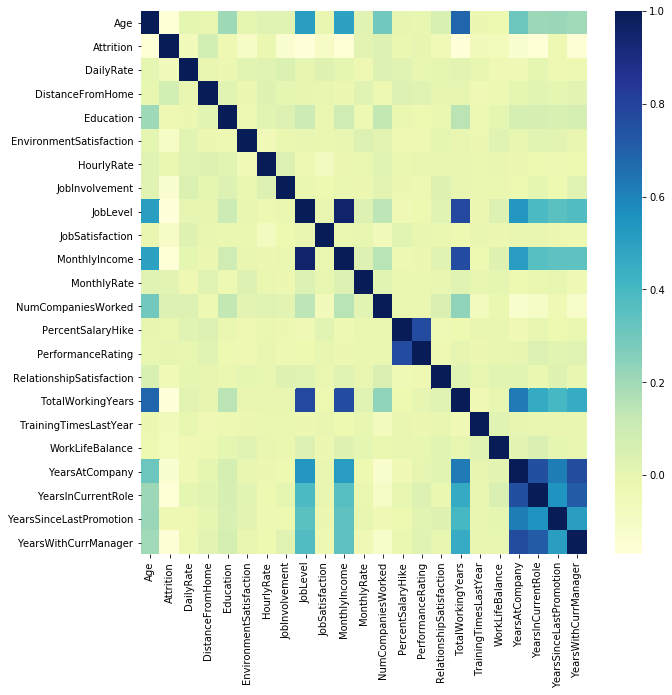

In [409]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu')
plt.show()

*Checking if any column contains null values*

In [410]:
#Summary based on Attrition
df=data.groupby('Attrition')
df.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,15.231144,3.153285,2.733982,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,15.097046,3.156118,2.599156,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


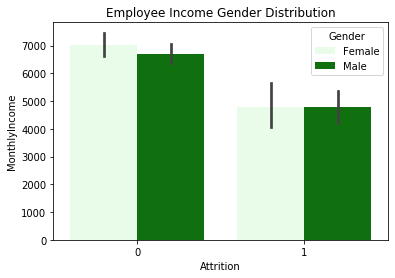

<Figure size 720x720 with 0 Axes>

In [411]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=data,color='green').set_title('Employee Income Gender Distribution')
plt.figure(figsize=(10, 10))
plt.show()

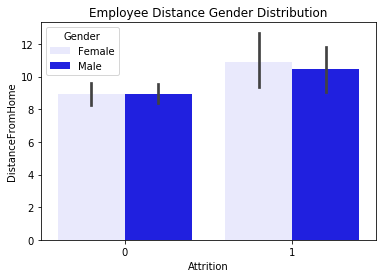

In [412]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=data,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

In [413]:
data['Income_bins']=pd.cut(data['MonthlyIncome'],[1000,2500,5000,10000,15000,20000])

[]

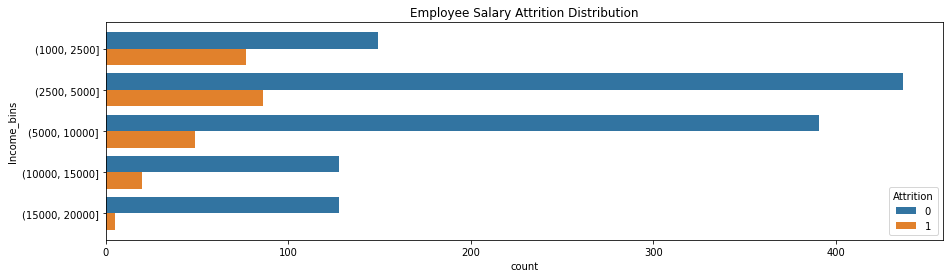

In [414]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='Income_bins',hue='Attrition',data=data).set_title('Employee Salary Attrition Distribution')
plt.plot()

In [415]:
data.drop(['Income_bins'], axis=1,inplace=True)

[]

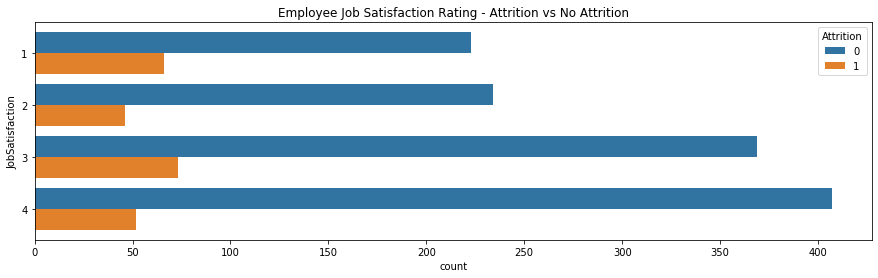

In [416]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='JobSatisfaction',hue='Attrition',data=data).set_title('Employee Job Satisfaction Rating - Attrition vs No Attrition')
plt.plot()

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

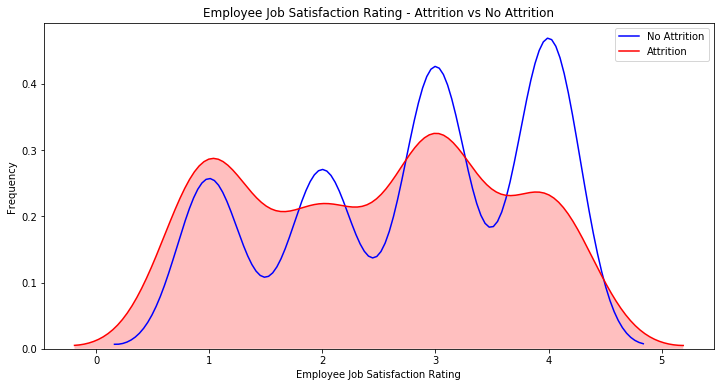

In [417]:
fig=plt.figure(figsize=(12,6))
ax=sns.kdeplot(data.loc[(data['Attrition']==0),'JobSatisfaction'],color='b',shade=False,label='No Attrition')
ax=sns.kdeplot(data.loc[(data['Attrition']==1),'JobSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

Text(0.5, 1.0, 'Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

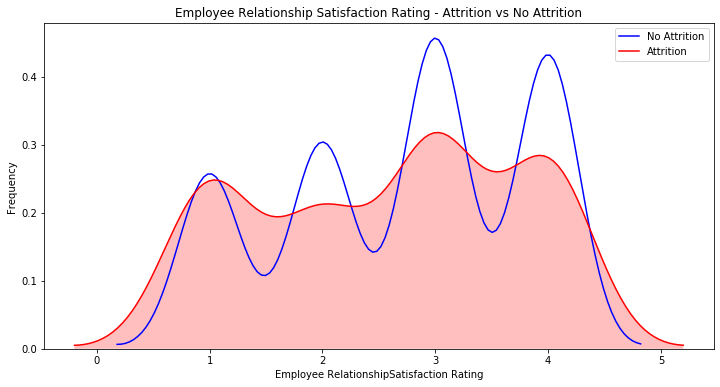

In [418]:
fig=plt.figure(figsize=(12,6))
ax=sns.kdeplot(data.loc[(data['Attrition']==0),'RelationshipSatisfaction'],color='b',shade=False,label='No Attrition')
ax=sns.kdeplot(data.loc[(data['Attrition']==1),'RelationshipSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee RelationshipSatisfaction Rating',ylabel='Frequency')
plt.title('Employee Relationship Satisfaction Rating - Attrition vs No Attrition')

In [419]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


<b>Label encoding all the categorical variables </b><br>
  

In [420]:
data['BusinessTravel'].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [421]:
#Creating dummy variables for the categorical variables
data['BusinessTravel']=data['BusinessTravel'].replace(['Non-Travel','Travel_Rarely','Travel_Frequently'],[0,1,2])
data['Department']=data['Department'].replace(['Human Resources', 'Research & Development', 'Sales'],[0,1,2])
data['EducationField']=data['EducationField'].replace(['Human Resources','Life Sciences','Marketing', 'Medical', 'Other', 'Technical Degree'],[0,1,2,3,4,5])
data['Gender']=data['Gender'].replace(['Female','Male'],[0,1])
data['JobRole']=data['JobRole'].replace(['Healthcare Representative','Human Resources','Laboratory Technician','Manager','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'],[0,1,2,3,4,5,6,7,8])
data['MaritalStatus']=data['MaritalStatus'].replace(['Divorced','Married','Single'],[0,1,2])
data['OverTime']=data['OverTime'].replace(['Yes','No'],[0,1])

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

<b>Splitting the data into train and test segments</b><br>
train_size as 0.8 and test_size as 0.2

In [423]:
train_data, test_data = train_test_split(data, train_size=0.8, test_size=0.2)

In [424]:
y_train = train_data['Attrition']
X_train = train_data.drop(['Attrition'], axis=1)
y_test = test_data['Attrition']
X_test = test_data.drop(['Attrition'], axis=1)

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=44)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=750,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=44, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [426]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=44)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.844


In [427]:
model=logreg
pred=model.predict(X_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print("accuracy: {:.2%}".format(model.score(X_test,y_test)))

True         0   1
Predicted         
0          237  37
1            6  14
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       243
           1       0.70      0.27      0.39        51

    accuracy                           0.85       294
   macro avg       0.78      0.62      0.66       294
weighted avg       0.84      0.85      0.83       294

accuracy: 85.37%
